# Decision Tree & Random Forest

For this project we will be exploring publicly available data from LendingClub.com. Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

%matplotlib inline

## Read & Explore the data

In [2]:
loans = pd.read_csv('loan_data.csv')
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
loans.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


### Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.

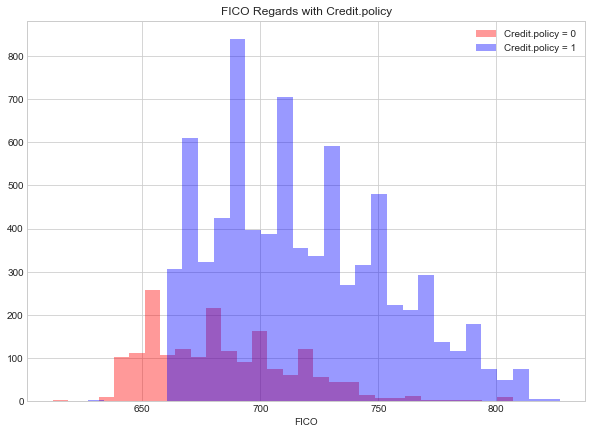

In [4]:
loans.head()
plt.figure(figsize=(10,7))
sns.distplot(loans[loans['credit.policy'] == 0]['fico'], bins=30,kde=False, color='red', label='Credit.policy = 0')
sns.distplot(loans[loans['credit.policy'] == 1]['fico'], bins=30,kde=False, color='blue', label='Credit.policy = 1')
plt.title('FICO Regards with Credit.policy')
plt.xlabel('FICO')
plt.legend()

### Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid.

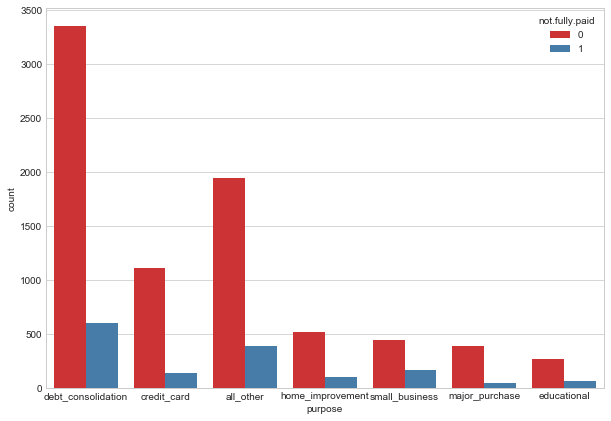

In [5]:
loans.head()
plt.figure(figsize=(10,7))
sns.countplot(data=loans, x='purpose', hue='not.fully.paid', palette='Set1')

## Pre-processing
### Transform the 'purpose' column using dummy variables so sklearn will be able to understand them.

In [9]:
final_data = pd.get_dummies(loans, columns=['purpose'], drop_first=True)

final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

## Train Test Split

In [11]:
from sklearn.model_selection import train_test_split
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Training a Decision Tree Model

In [12]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Predictions and Evaluation

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

preditions = dtree.predict(X_test)

print(confusion_matrix(y_test, preditions))
print('\n')
print(classification_report(y_test, preditions))

[[1981  450]
 [ 339  104]]


             precision    recall  f1-score   support

          0       0.85      0.81      0.83      2431
          1       0.19      0.23      0.21       443

avg / total       0.75      0.73      0.74      2874



## Training the Random Forest model

In [14]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Predictions and Evaluation

In [15]:
predictions = rfc.predict(X_test)

print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[2425    6]
 [ 433   10]]


             precision    recall  f1-score   support

          0       0.85      1.00      0.92      2431
          1       0.62      0.02      0.04       443

avg / total       0.81      0.85      0.78      2874



### The Random Forest model performs better!